# 14 Sep 23 - Dynamical Systems Continued

Last time we investigated the phase portrait of the large angle pendulum, we we could arrive at by re-writing the differential equation 

$$
\ddot{\theta} = -\dfrac{g}{L}\sin(\theta)
$$

as 2 first-order differential equations:

$$
\dot{\theta} = \omega \hspace{0.5in}\text{and}\hspace{0.5in} \dot{\omega} = -\frac{g}{L}\sin(\theta)
$$

By setting both of these equations equal to zero simultaneously, we also argued that this system has ([countably](https://faculty.math.illinois.edu/~kapovich/417-16/card.pdf)) infinite fixed points at $(n\pi, 0)$ for  $n\in \mathbb{Z}$ in $(\theta,\omega)$ phase space. 

Now we turn to the challenge of characterizing these fixed points with the linearization of the system (see the end of tuesday's activiy for some more notes on this). Recall that we can do this by finding the eigenvalues of the Jacobian Matrix of the system at its fixed point. For the system $\dot{x} = f(x,y)$, $\dot{y} = g(x,y)$ the jacobian matrix looks like this:

$$
A = \begin{bmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}\end{bmatrix}_{(x^*,y^*)}
$$

**&#9989; Do this** 
(this is the same problem as the last problem from tuesday)

Calculate the general Jacobian matrix $A$ for this system, then calculate what it is at the fixed point $(0,0)$.

We have the Jacobian at $(0,0)$ now but we still need to find its eigenvalues. Let's take a quick detour to remember how to do that.

## Eigenvalues

Eigenvalues and the closely related Eigenvectors are indispensible in physics, math, and computational science. These ideas for the basis (pun somewhat intened) for countless problems, from the [energy eigenvalue equation](https://phys.libretexts.org/Bookshelves/Nuclear_and_Particle_Physics/Introduction_to_Applied_Nuclear_Physics_(Cappellaro)/02%3A_Introduction_to_Quantum_Mechanics/2.04%3A_Energy_Eigenvalue_Problem) that is the founcation of quantum mechanics, to the stability of complex nonlinear systems, to Normal Modes of oscillators, which we'll study later in this course, eigenproblems show up all over in physics. I can't resist a brief tangent: Once some scientists were using an eigenvalue driven algorithm called principal component analysis to study the genes of people that live in Europe. They found that these egenvalues/vectors reproduced a map of Europe with surprising accuracy ([link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2735096/)). So these tools are extremely, and often unreasonably powerful.

Eigenvalues are the $\lambda$ in the equation:

$$
A\mathbf{v} = \lambda \mathbf{v}
$$

Where $A$ is a linear operator of the vector space that $\mathbf{v}$ lives in. In finite-dimensional vector spaces, like what we're considering today, these linear operators are always matricies. There is a bit of physical intuition behind this equation: An eigenvector of $A$ is a vector that only gets stretched or squished by $\lambda$ when $A$ acts on $\mathbf{v}$. Here's a gif from Grant Sanderson's [fantastic video](https://www.youtube.com/watch?v=PFDu9oVAE-g) on eigenvalues and eigenvectors that shows this:


<img src="https://thumbs.gfycat.com/FluffyMiniatureBackswimmer-max-1mb.gif" alt="Computer man" style="width:320px;height:180px;">


### Finding Eigenvalues

To actually find the eigenvalues of a matrix, you solve the **characteristic polynomial** of the matrix, which you obtain by solving the equation:

$$
|A - \lambda I | = 0 
$$

Where the vertical bars means determinant.

To find Eigenvectors, simply plug in the values you found for $\lambda$ into the original eigenvalue equation $A\mathbf{v} = \lambda \mathbf{v}$, using $\mathbf{v} = \begin{bmatrix}x \\ y\end{bmatrix}$. You'll find some simple relationship between $x$ and $y$. Any scalar multiple of an eigenvector is also an eigenvector so we usually just choose the simplest one. Say if you found that $x = -y$. Then for a nice clean looking eigenvector you could choose $\begin{bmatrix} -1 \\ 1\end{bmatrix}$. 

**&#9989; Do this** 

Analytically, find the eigenvalues of the Jacobian matrix you calculated earlier. Use the below bullets to identify these eigenvalues with the type of the fixed point.

- $\mathrm{Re}(\lambda) > 0 $ for both eigenvalues: Repeller/Source (unstable)
- $\mathrm{Re}(\lambda) < 0 $ for both eigenvalues: Attractor/Sink  (stable)
- One eigenvalue positive, one negative: Saddle
- Both eigenvalues pure imaginary: Center

Note: You can actually learn quite a bit more from this analysis, see Strogatz chaper 6.

### Eigenvalues, Computationally 

We can use `np.linalg.eig()` to find the eigenvalues (and normalized eigenvectors) of a matrix which we represent as numpy array. Below is some doe that does this (note the imaginary unit is represented as $j$ in python):

In [57]:
import numpy as np
A = np.array([[0,1],[-1,0]])
eigvals = np.linalg.eig(A)[0]
eigvecs = np.linalg.eig(A)[1]

print("eigenvalues:", eigvals)

eigenvalues: [0.+1.j 0.-1.j]


This can be super handy when you just need to do some quick caracterization from the eigenvalues of a matrix. However, be warned - since you only get numerical answers you can lose quite a bit of the nuance that comes from if you had calculated these. We'll see how that can be an issue later in the semester when we tackle normal modes. 

## Activity: Lotka - Volterra Equations

The Lotka -Volterra Equations are a pair of coupled ODEs

$$\dot{x}= x(A − Bx - Cy)$$

$$\dot{y}= y(D - Fx - Gy)$$

with $A,B,C,D,F,G > 0$

That model the time evolution of the competition between two species, say rabbits and sheep. We'll say $x$ is the number of rabbits while $y$ is the number of sheep. This model reduces to the logistic growth model if we were to ignore the competition, say if $\dot{x}= x(A − Bx)$

**&#9989; Do this** 
1. What do each of the parameters $A,B,C,D,F,G$ represent? Why do you say so?
2. Identify the fixed points of this system (there might be more than 2!)
3. Find the Jacobian for these equations
4. Modify the starter code below to so it gives you the eigenvalues of the jacobian for a given $A,B,C,D,x^*,y^*$.
5. For the set of values of $A,B,C,D,F,G$ given in the code below, sketch what you expect the phase portrait of this system to look like. Then run the the code 2 cells below to see how well you did.
6. Experiment with choosing different values for A,B,C,D,F,G. Does the behavior of the system change for with different choices? (the initial values given below should be a good starting point).

In [85]:
def jacobian(A,B,C,D,x,y):
    return np.array([[0,0],[0,0]]) # CHANGE

A,B,C,D,F,G = 3,1,2,2,1,1
x1,y1 = 0,0 # 1st fixed point
x2,y2 = 0,0 # 2nd fixed point CHANGE
# more fixed points here...

print("eigenvalues, 1st fixed point:",np.linalg.eig(jacobian(A,B,C,D,x1,y1))[0])
print("eigenvalues, 2nd fixed point:",np.linalg.eig(jacobian(A,B,C,D,x2,y2))[0])

eigenvalues, 1st fixed point: [0. 0.]
eigenvalues, 2nd fixed point: [0. 0.]


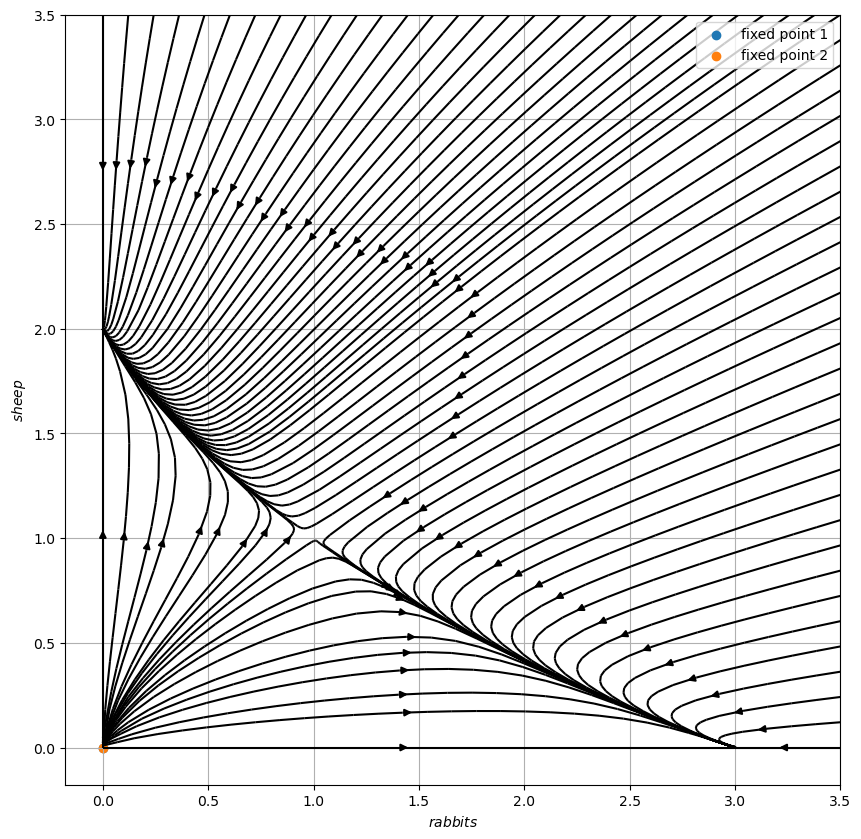

In [90]:
import matplotlib.pyplot as plt
def LV_eqns(x, y):
    xdot, ydot = [x*(A - B*x - C*y), y*(D - F*x - G*y)]
    return xdot, ydot

def LV_phase(X, VX):
    xdot, ydot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], ydot[i,j] = LV_eqns(xloc, yloc)
    return xdot, ydot

N = 40
x = np.linspace(0., 3.5, N)
y = np.linspace(0., 3.5, N)
X, Y = np.meshgrid(x, y)
xdot, ydot = LV_phase(X, Y)
ax = plt.figure(figsize=(10,10))
Q = plt.streamplot(X, Y, xdot, ydot, color='k',broken_streamlines = False)
plt.scatter(x1,y1, label = 'fixed point 1')
plt.scatter(x2,y2, label = "fixed point 2")
plt.legend()
plt.grid()
plt.xlabel('$rabbits$')
plt.ylabel('$sheep$')
plt.show()

## Investigating the Van der Pol Oscillator

It turns out there is some more interesting behavior other than just the behavior around fixed points. Toward seeing that, let's look at the Van der Pol Oscillator. This equation originates from lonlinear circuits in early radios, but has now also been used in neuroscience and geology. It is given by the differential equation:

$$
\ddot{x} = -\mu (x^2 - 1)\dot{x} - x
$$

or, written as two first order equations:

$$
\dot{x} = v \hspace{1in} \dot{v} = -\mu (x^2 - 1)v - x
$$

With $\mu > 0$. Note that this equation is simply the harmonic oscillator when $\mu = 0$. The strange $-\mu (x^2 - 1)\dot{x}$ represents damping, but this damping behaves strangely, because when $|x|<1$ it is negative damping, that is it boosts oscillations smaller than $1$, while still slowing down oscillations larger than $1$. 

Now we play the usual game of trying to figure out how this system behaves:

**&#9989; Do this** 

1. Identify the fixed point of this system. Follow the linearization procedure to characterize it. 
2. Edit the code below to produce a phase plot for the Van der Pol oscillator. This code also numerically integrates a trajectory and plots it. Add a second trajectory and plot that as well.
3. What happens to phase space when you change the value of $\mu$? What if you make it negative?
4. What behavior do you notice here that's different than you've seen before? What is attracting the trajectories?


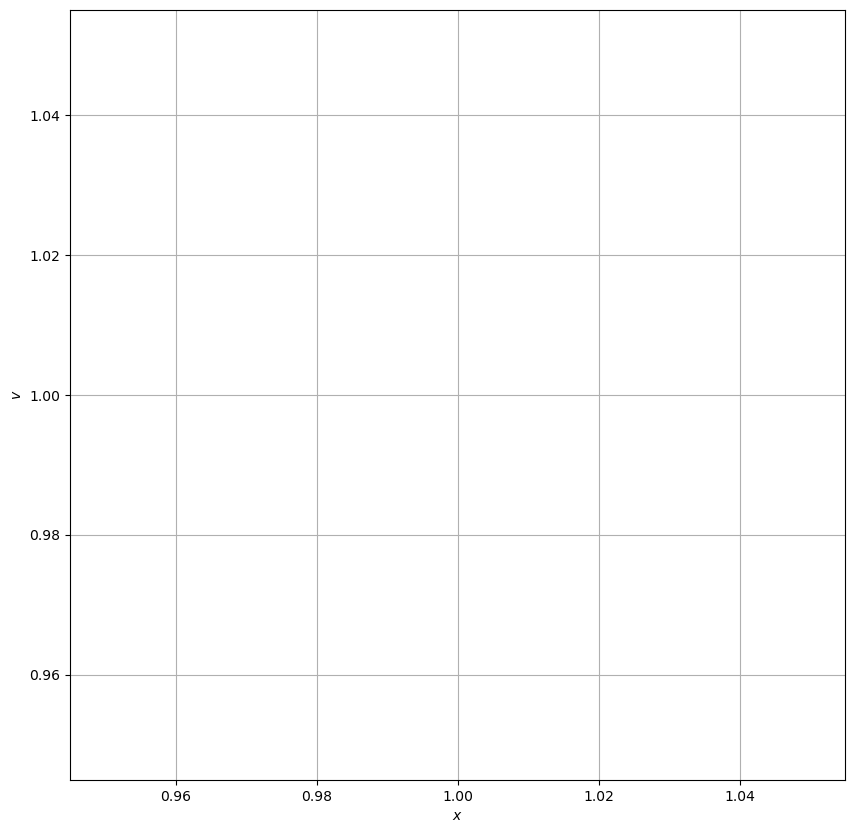

In [60]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def VP_eqn(x, v, mu = 1.):
    xdot, vdot = [0,0] ## CHANGE
    return xdot, vdot

def VP_phase(X, VX, mu):
    xdot, vdot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vdot[i,j] = VP_eqn(xloc, yloc,mu)
    return xdot, vdot

def VP_eqn_for_solve_ivp(t,curr_vals, mu=1): # need to rephrase this to work with what solve_ivp expects
    x, v = curr_vals 
    xdot, vdot = VP_eqn(x,v,mu)
    return xdot,vdot

# Numerical Integration
tmax = 20
dt = 0.05
tspan = (0,tmax)
t = np.arange(0,tmax,dt)
mu = 1.
initial_condition = [1, 1] 
solved = solve_ivp(VP_eqn_for_solve_ivp,tspan,initial_condition,t_eval = t, args = (mu,),method="RK45")


# Plotting stuff
N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
xdot, vdot = VP_phase(X, V,mu)
ax = plt.figure(figsize=(10,10))
Q = plt.streamplot(X, V, xdot, vdot, color='k',broken_streamlines = False)
plt.plot(solved.y[0],solved.y[1],lw = 3,c = 'red') # plot trajectory from solve_ivp
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()

**&#9989; Do this** 

Based on the phase space diagram, what do you expect actual trajectories to look like in $x$ vs $t$ space? Use the numerically integrated trajectories to plot that.

In [61]:
## your code here

### Limit Cycles

The new behavior we've seen from this equation is what's called a **limit cycle**, where the system is attracted/reppeled from a closed curve instead of a fixed point(s). There's a lot of really great math here that's a bit beyond what we can cover in class, but it would be a great thing to look into for a project!

**&#9989; Do this** 

Spend the rest of class investigating the Van der Pol oscillator. Here are a few investigations you could do:

 - When $\mu$ changes from negative to positive, this system undergoes what is known as a **Hopf Bifurcation** Look up what bifurcations are to understand what this means and show that it is true using numerical integration. 
 - Add an $A\sin(t)$ driving force term to the differential equation and numerically integrate. What do these trajectories look like in $x$ vs $t$ and in phase space?
 - Examine the energetics of this system. Is energy conserved or does it have some interesting behavior? Why?

In [62]:
# code here